## Load Common Python Libraries

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
# Importing the dataset

df=pd.read_csv('C:\\Users\\Azubuike Orioha\\BikeSales.csv')

In [50]:
# Make a copy of the dataset

df2=df.copy()

In [53]:
# summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [54]:
# Count missing (null) values in each column of the DataFrame

df.isnull().sum()


Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [55]:
# dimensions of the DataFrame

df.shape

(113036, 18)

In [56]:
#  data types of each column in the DataFrame

df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [57]:
# count the number of duplicate rows in DataFrame

df.duplicated().sum()

1000

In [58]:
# returns an array of all unique states column in the DataFrame 

df['State'].unique()

array(['British Columbia', 'New South Wales', 'Victoria', 'Oregon',
       'California', 'Saarland', 'Seine Saint Denis', 'Moselle',
       'Queensland', 'England', 'Nord', 'Washington', 'Hessen',
       'Nordrhein-Westfalen', 'Hamburg', 'Loir et Cher', 'Kentucky',
       'Seine (Paris)', 'South Australia', 'Loiret', 'Alberta', 'Bayern',
       'Hauts de Seine', 'Yveline', 'Essonne', "Val d'Oise", 'Tasmania',
       'Seine et Marne', 'Val de Marne', 'Pas de Calais',
       'Charente-Maritime', 'Garonne (Haute)', 'Brandenburg', 'Texas',
       'New York', 'Florida', 'Somme', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Ontario',
       'Wyoming', 'Missouri', 'Montana', 'Utah', 'Minnesota',
       'Mississippi', 'Massachusetts', 'Arizona', 'Alabama'], dtype=object)

In [59]:
# counts unique values in the 'State' column

df['State'].nunique()

53

## Cleaning the Data

In [60]:
# remove duplicate rows from the DataFrame

df.drop_duplicates(inplace=True)

In [61]:
# count number of duplicate rows in the DataFrame

df.duplicated().sum()

0

In [62]:
 # convert all column names in the DataFrame to lowercase.
    
df.columns = df.columns.str.lower()

In [63]:
 # check the columns names are now in lowercase.
    
df.columns 

Index(['date', 'day', 'month', 'year', 'customer_age', 'age_group',
       'customer_gender', 'country', 'state', 'product_category',
       'sub_category', 'product', 'order_quantity', 'unit_cost', 'unit_price',
       'profit', 'cost', 'revenue'],
      dtype='object')

In [64]:
# return an array of the unique values in the customer_gender column 

df['customer_gender'].unique()

array(['M', 'F'], dtype=object)

In [65]:
# replaces values in the customer_gender with the new value

df['customer_gender'].replace('M', 'Male', inplace = True)
df['customer_gender'].replace('F', 'Female', inplace = True)

In [66]:
# check the new values in the customer_gender column 

df['customer_gender'].unique()

array(['Male', 'Female'], dtype=object)

In [67]:
# delete/ drop specificed columns

del_columns = ['day', 'profit','cost', 'revenue']
df.drop(del_columns, axis=1, inplace =True)

In [68]:
# adding three new columns and generating new calcualtions for the Total_cost, Revenue and profits 

df['total_cost'] = df['order_quantity'] * df['unit_cost']
df['revenue'] = df['order_quantity'] * df['unit_price']
df['profit'] = df['revenue'] * df['total_cost']

In [69]:
# change date type from object to datetime format 

df['date'] = pd.to_datetime(df['date'])

In [70]:
 # remove any leading and trailing whitespace from the column names
    
df.columns = df.columns.str.strip()

## Analysisng the Data

In [71]:
# return the count of unique values in each column
    
df.nunique()

date                1884
month                 12
year                   6
customer_age          70
age_group              4
customer_gender        2
country                6
state                 53
product_category       3
sub_category          17
product              130
order_quantity        32
unit_cost             34
unit_price            36
total_cost           360
revenue              436
profit               674
dtype: int64

In [75]:
#  returns an array of all unique country column in the DataFrame 

df['country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [76]:
# return the unique values from the column Product_Category in the DataFrame

df['product_category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [77]:
# count the occurrences of each unique value in the Product_Category column

category_counts = df['product_category'].value_counts()
category_counts

Accessories    69312
Bikes          25794
Clothing       16930
Name: product_category, dtype: int64

In [36]:
# return the unique values from the column Product_Category in the DataFrame

df['sub_category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [78]:
#  count the occurrences of each unique value in the Sub_Category column

category_counts = df['sub_category'].value_counts()
print(category_counts)

Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Caps                  4358
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: sub_category, dtype: int64


In [79]:
# return the unique values from the column Product_Category in the DataFrame

df['product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [80]:
#  count the occurrences of each unique value in the Product_catergory column

product_counts = df['product'].value_counts()

print(product_counts)

Water Bottle - 30 oz.      10641
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: product, Length: 130, dtype: int64


In [81]:
# returns the count for the occurrences of each unique value in the age_group

df['age_group'].value_counts()

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: age_group, dtype: int64

## Visualizing the Data

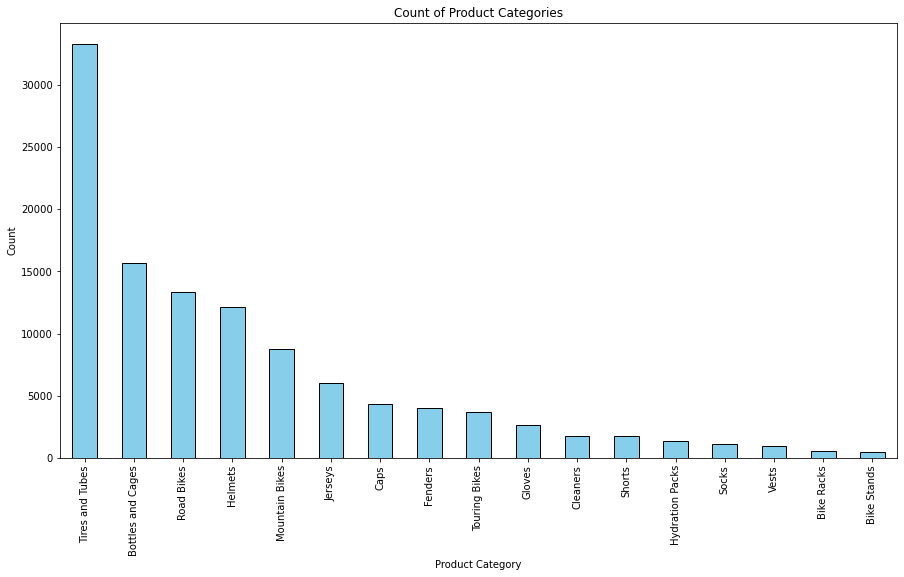

In [101]:
# Plot the bar chart to visualize the count of the different product catergories

category_counts.plot(kind='bar', figsize=(15,8), color='skyblue', edgecolor='black')

figsize=(10,5)


# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Product Categories')

# Display the plot
plt.show()

In [102]:
# Group by 'year' and sum up the 'profit' for each year

yearly_profits = df.groupby('year')['profit'].sum()

print(yearly_profits)

year
2011    39103704512
2012    30580192364
2013    20598206136
2014    14062848836
2015    50348101822
2016    35044529594
Name: profit, dtype: int64


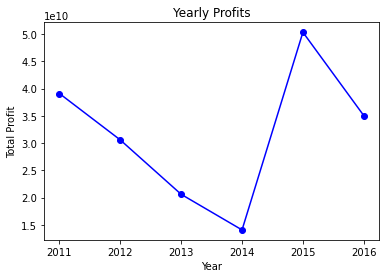

In [63]:
# Plotting the line chart visualising the yearly profits

yearly_profits.plot(kind='line', marker='o', color='b', linestyle='-', title='Yearly Profits')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Yearly Profits')

# Display the chart
plt.show()

In [103]:
# calculate the total profit for each month by grouping the data by the month column


month_profit = df.groupby('month') ['profit'].sum()
print(month_profit)

month
April        16381075198
August       12470820734
December     20341977844
February     14404979147
January      15867243934
July         19197078829
June         19024406460
March        15560339967
May          18851356802
November     12919848391
October      12196138214
September    12522317744
Name: profit, dtype: int64


In [104]:
# creating a new dataframe for month and total profits 

month_profit= pd.DataFrame (month_profit)


month_profit = month_profit.reset_index()
month_profit


,month,profit
0,April,16381075198
1,August,12470820734
2,December,20341977844
3,February,14404979147
4,January,15867243934
5,July,19197078829
6,June,19024406460
7,March,15560339967
8,May,18851356802
9,November,12919848391


In [105]:
print(month_profit[month_profit['month'].isna()])

Empty DataFrame
Columns: [month, profit]
Index: []


In [106]:
# Define the correct month order

sort_order = ['January', 'February', 'March','April', 'May','June ', 'July', 'August', 'September', 'October', 'November', 'December']


# Convert the 'month' column to a Categorical with the desired sort order
month_profit['month'] = pd.CategoricalIndex(month_profit['month'], categories=sort_order, ordered=True)

month_profit=month_profit.sort_index()

# Now sort by the categorical month column
month_profit = month_profit.sort_values('month').reset_index(drop=True)

In [107]:
month_profit

,month,profit
0,January,15867243934
1,February,14404979147
2,March,15560339967
3,April,16381075198
4,May,18851356802
5,July,19197078829
6,August,12470820734
7,September,12522317744
8,October,12196138214
9,November,12919848391


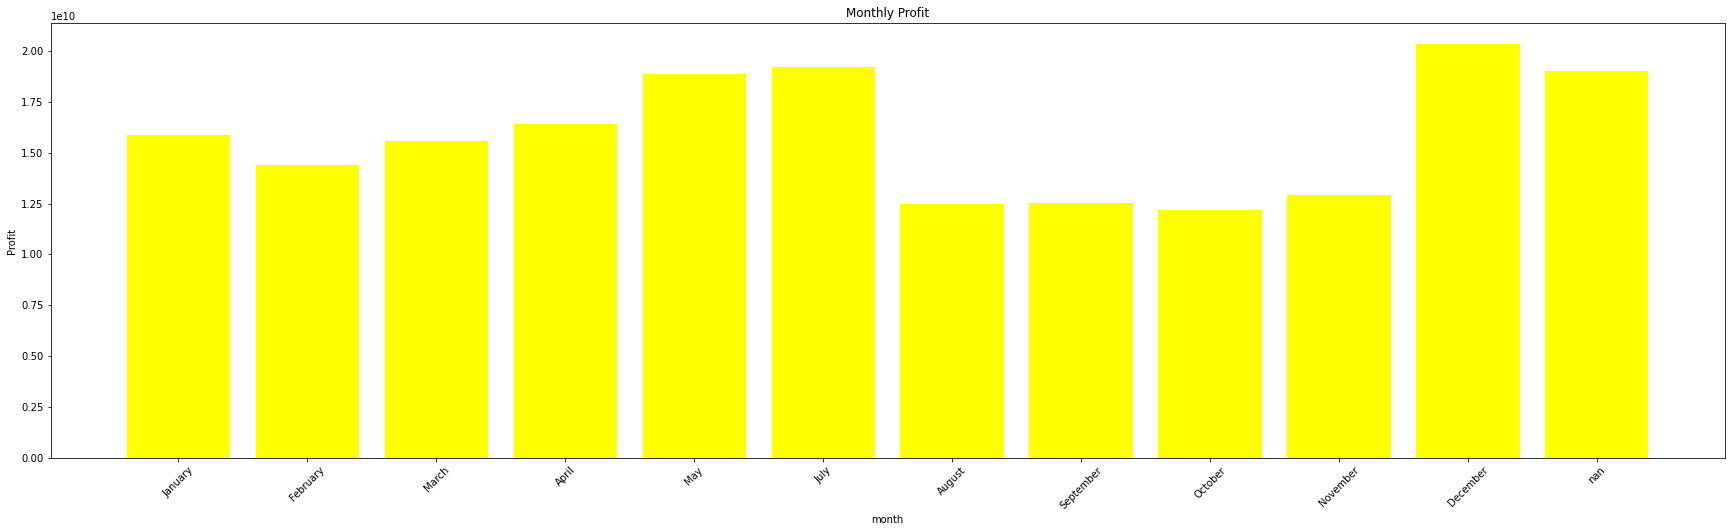

In [108]:
# Convert 'month' to string type for plotting

plt.figure(figsize=(30, 8))
plt.bar(month_profit['month'].astype(str), month_profit['profit'], color='Yellow')

# Adding labels and title
plt.xlabel('month')
plt.ylabel('Profit')
plt.title('Monthly Profit')

# Rotate month names for better readability if needed
plt.xticks(rotation=45)  

# Show the plot
plt.show()

In [109]:
# calculate the average order quantity for each month

average_order = df.groupby('month')['order_quantity'].mean().round(3).sort_values(ascending=False)


In [111]:
# Calculates the total revenue for each year by grouping the data by year

year_revenue=df.groupby('year')['revenue'].sum().sort_values()
year_revenue

year
2011    10051324
2012    10243236
2014    15583042
2013    16892817
2016    19599815
2015    22318354
Name: revenue, dtype: int64

Text(0.5, 1.0, 'Revenue by Year')

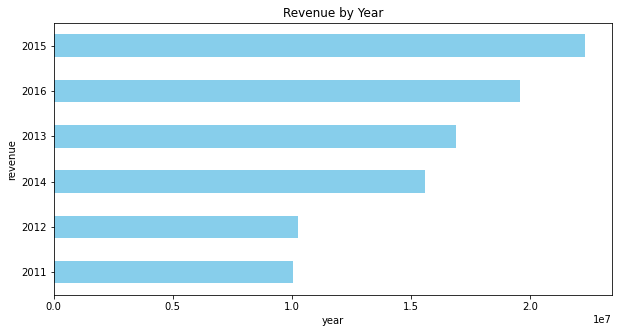

In [112]:
# Creates a horizontal bar chart to visualize revenue by year
    
year_revenue.plot(kind = 'barh', figsize=(10,5), color='skyblue' )

# Adding labels and title
plt.xlabel('year')
plt.ylabel('revenue')
plt.title('Revenue by Year')


In [113]:
# calculate the average revenue for each year

average_year = df.groupby('year')['revenue'].mean().round(3)
average_year

year
2011    3763.131
2012    3845.059
2013     697.359
2014     535.095
2015     921.218
2016     672.886
Name: revenue, dtype: float64

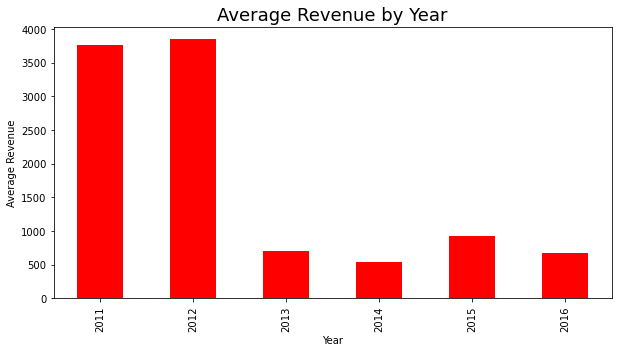

In [114]:
# generate a vertical bar chart that visualizes the average Revenue for each year

average_year.plot(kind='bar', figsize=(10, 5), color='red')

# Adding labels and title
plt.title('Average Revenue by Year',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()

In [115]:
# Calculate the Total Orders by Gender

gender_order = df.groupby('customer_gender')['order_quantity'].sum()
gender_order

customer_gender
Female    639958
Male      693747
Name: order_quantity, dtype: int64

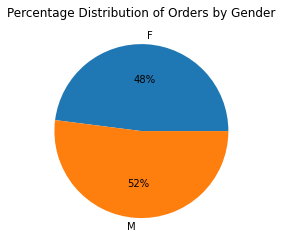

In [141]:
# Generate a pie chart that visualizes the order qauntity 
# based on the customers gender in percentage 


genders=list(gender_order.index)
value=list(gender_order.values)

# Creating a pie chart with specified colors
plt.pie(value,labels=genders,autopct='%.0f%%')

# Adding a title
plt.title('Percentage Distribution of Orders by Gender')


# Display the plot
plt.show()



In [121]:
Country_Revenue = df.groupby('country')['revenue'].sum()
Country_Revenue

country
Australia         25303706
Canada             7984694
France             9825708
Germany            9958420
United Kingdom    11016494
United States     30599566
Name: revenue, dtype: int64

In [124]:
# Calculate the Revenue by each Country

country_revenue=df.groupby('country')['revenue'].sum()
country_revenue

country
Australia         25303706
Canada             7984694
France             9825708
Germany            9958420
United Kingdom    11016494
United States     30599566
Name: revenue, dtype: int64

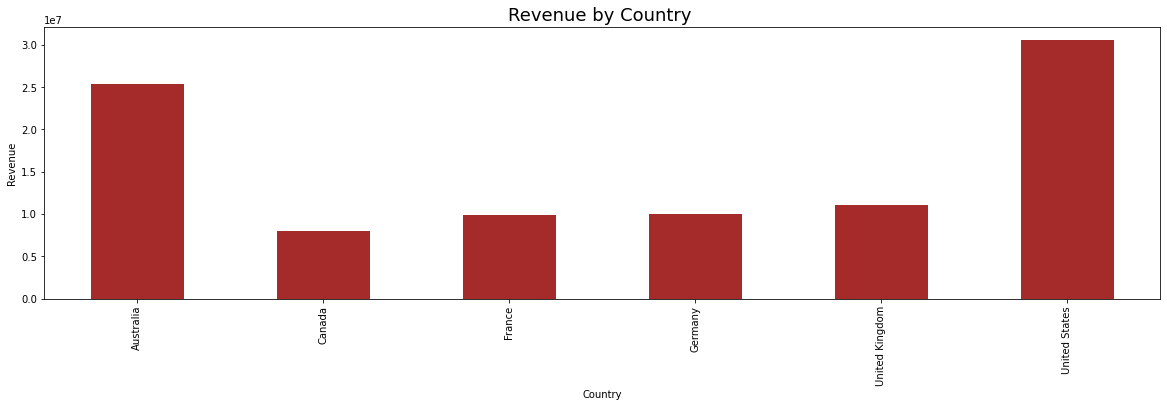

In [125]:
# generate bar chart that visualizes the revenue generated by each country

country_revenue.plot(kind='bar', figsize=(20,5), color='brown')


# Adding labels and title
plt.title('Revenue by Country ',fontsize=18)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()


In [126]:
# profits by

profit=df.groupby('country')['profit'].sum().sort_values()
profit


country
Canada            12944092397
Germany           18645270582
United Kingdom    19077177836
France            19687394484
United States     59010496593
Australia         60373151372
Name: profit, dtype: int64

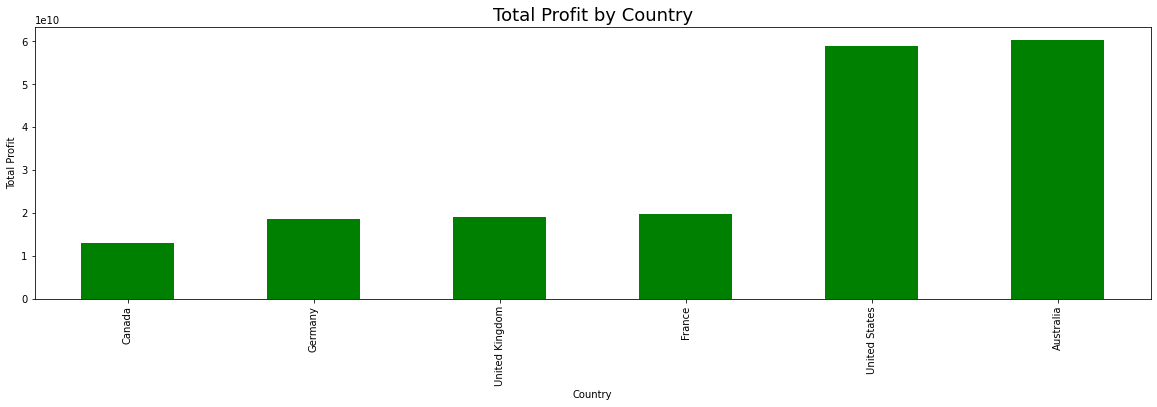

In [127]:
# Generate bar chart that visualizes the profits generated by each country

profit.plot(kind='bar', figsize=(20, 5), color='green')

# Adding labels and title
plt.title('Total Profit by Country', fontsize=18)
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.show()

In [129]:
# Total Orders by Country

country_orders =df.groupby('country')['order_quantity'].sum().sort_values()
country_orders


country
Germany           124755
France            127872
United Kingdom    155769
Canada            190202
Australia         261227
United States     473880
Name: order_quantity, dtype: int64

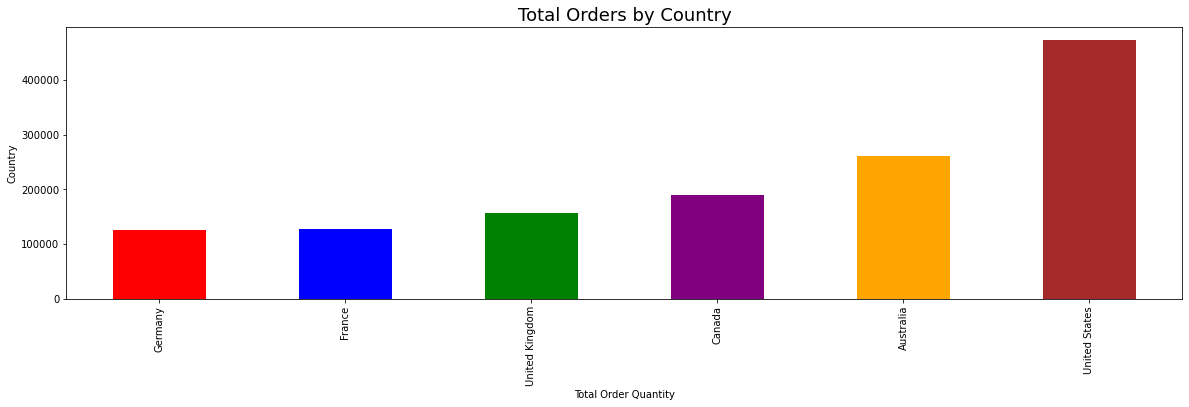

In [179]:
# Generate bar chart that visualizes the total orders by country


# Example list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

# Plot the bar chart with individual colors
country_orders.plot(kind='bar', figsize=(20, 5), color=colors)

# Adding labels and title
plt.title('Total Orders by Country', fontsize=18)
plt.xlabel('Total Order Quantity')
plt.ylabel('Country')
plt.show()

In [130]:
 # Return the top 10 states with the highest total revenue

top_ten_revenue = df.groupby('state')['revenue'].sum().sort_values().nlargest(10)
top_ten_revenue



state
California          17887092
England             11016494
New South Wales     10489298
Washington           8590886
British Columbia     7926676
Victoria             6377026
Queensland           6018596
Oregon               3994213
Saarland             2471294
Hessen               2223581
Name: revenue, dtype: int64

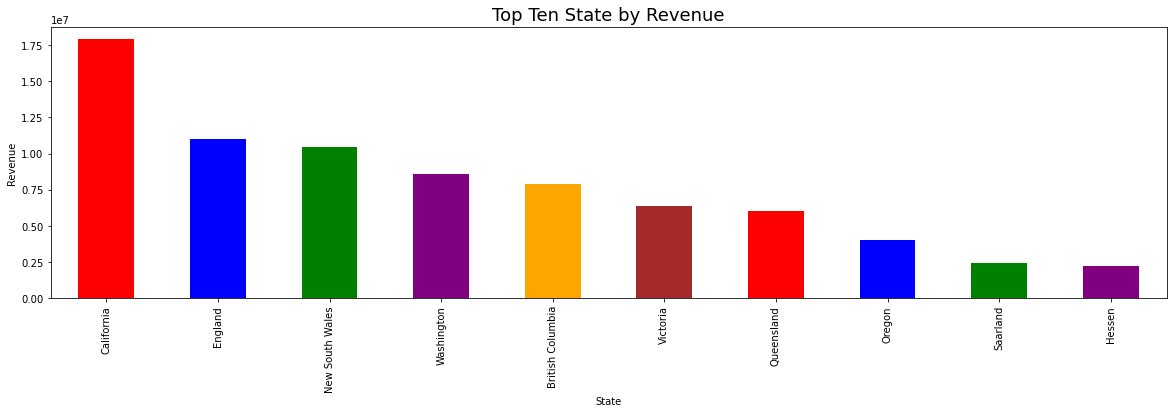

In [131]:
# Generate bar chart that visualizes the orders by country

# Example list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

top_ten_revenue.plot (kind = 'bar', figsize =(20, 5), color = colors )

# Adding labels and title
plt.title('Top Ten State by Revenue', fontsize=18)
plt.xlabel('State')
plt.ylabel('Revenue')
plt.show()



In [134]:
 # Return the top 10 states with the highest total revenue

top_ten_profit = df.groupby('state')['profit'].sum().sort_values().nlargest(10)
top_ten_profit

state
California          34026815825
New South Wales     22903840700
Queensland          19147207031
England             19077177836
Washington          17118322644
Victoria            13570373629
British Columbia    12749593544
Oregon               7582281752
Saarland             4600818515
Hessen               4426651364
Name: profit, dtype: int64

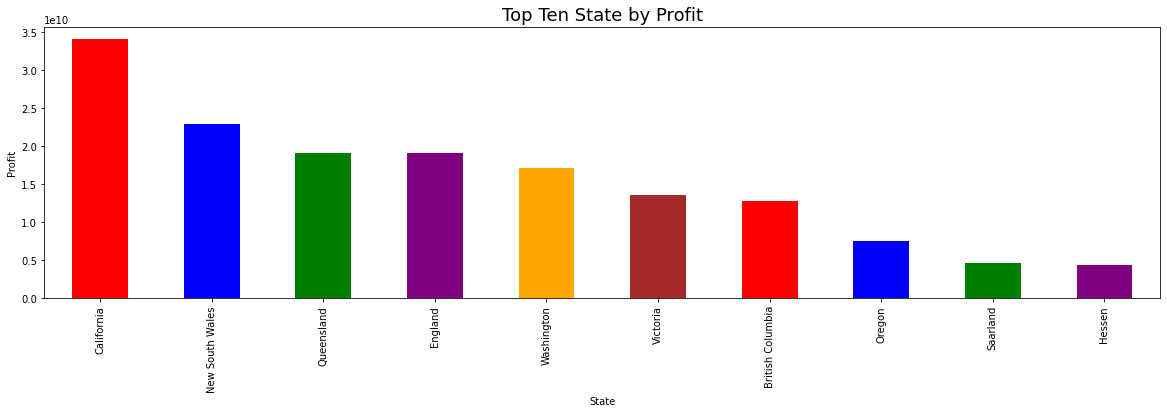

In [135]:
# Generate bar chart that visualizes the top ten states by profits 

# Example list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

top_ten_profit.plot (kind = 'bar', figsize =(20, 5), color = colors )

# Adding labels and title
plt.title('Top Ten State by Profit', fontsize=18)
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

In [139]:
 # Return the top 10 sub_category with the highest profit

subcategory_profit = df.groupby('sub_category')['profit'].sum().sort_values().nlargest(10)
subcategory_profit

sub_category
Road Bikes         108945800545
Mountain Bikes      50234469780
Touring Bikes       15916070701
Vests                5990873664
Jerseys              3602827556
Helmets              1645615790
Shorts               1001163800
Tires and Tubes       859018675
Hydration Packs       450966460
Bike Racks            345346200
Name: profit, dtype: int64

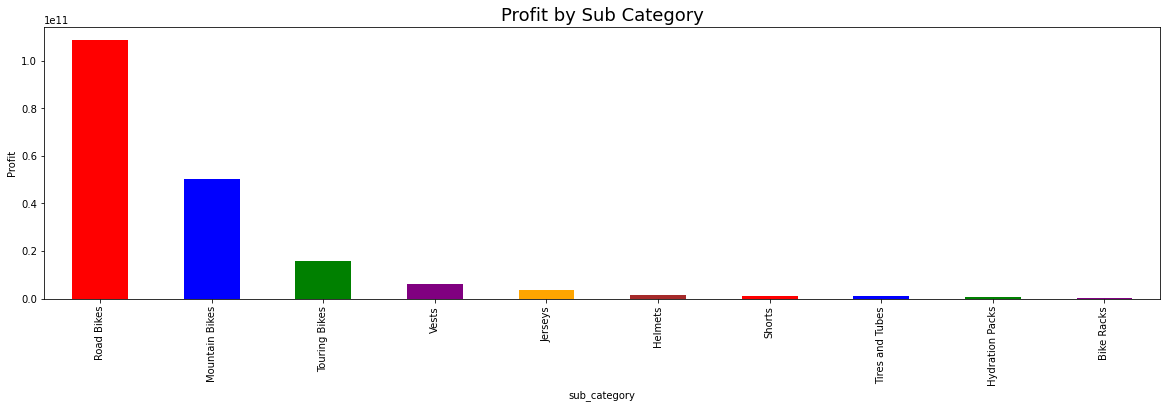

In [141]:
# Generate bar chart that visualizes the total profits by sub-category


# Example list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

subcategory_profit.plot (kind = 'bar', figsize =(20, 5), color = colors )

# Adding labels and title
plt.title('Profit by Sub Category', fontsize=18)
plt.xlabel('sub_category')
plt.ylabel('Profit')
plt.show()



In [142]:
# Profit by Product Category

 # Return the product_category with the highest profit

productcategory_profit = df.groupby('product_category')['profit'].sum().sort_values().nlargest(10)
productcategory_profit


product_category
Bikes          175096341026
Clothing        10863914814
Accessories      3777327424
Name: profit, dtype: int64

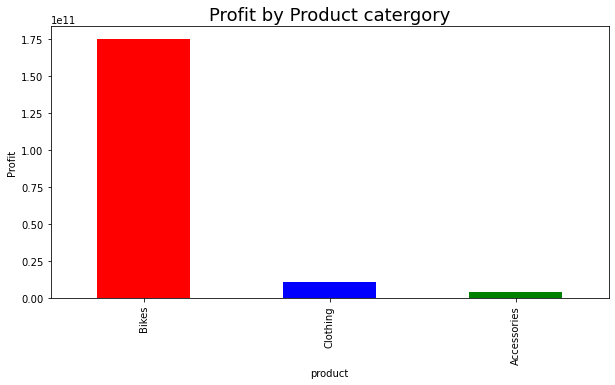

In [145]:
# Generate bar chart that visualizes the total profits by sub-producy category


# Example list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

productcategory_profit.plot (kind = 'bar', figsize =(10, 5), color = colors )

# Adding labels and title
plt.title('Profit by Product catergory', fontsize=18)
plt.xlabel('product')
plt.ylabel('Profit')
plt.show()

In [149]:
# returns the revenvue generated by each age group

Age_revenue=df.groupby('age_group')['revenue'].sum()
Age_revenue

age_group
Adults (35-64)          47086840
Seniors (64+)             338656
Young Adults (25-34)    34104452
Youth (<25)             13158640
Name: revenue, dtype: int64

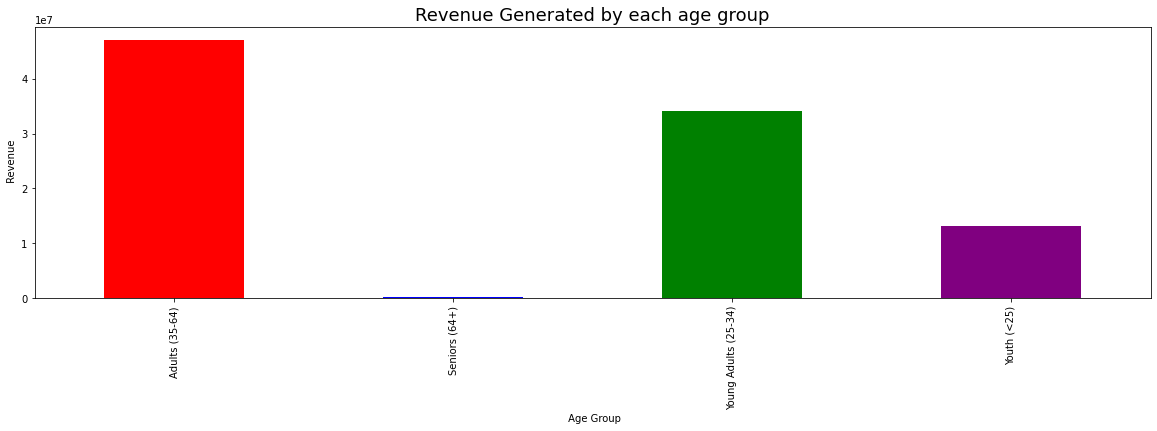

In [152]:
# Generate bar chart that visualizes the revenue generated by age_groups


# Example list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

Age_revenue.plot (kind = 'bar', figsize =(20, 5), color = colors )

# Adding labels and title
plt.title('Revenue Generated by each age group', fontsize=18)
plt.xlabel(' Age Group')
plt.ylabel(' Revenue')
plt.show()